Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 243ms/step - accuracy: 0.0000e+00 - loss: 0.6975 - val_accuracy: 0.0000e+00 - val_loss: 0.7043
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6111 - loss: 0.6913 - val_accuracy: 0.0000e+00 - val_loss: 0.7059
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6111 - loss: 0.6855 - val_accuracy: 0.0000e+00 - val_loss: 0.7116
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6111 - loss: 0.6806 - val_accuracy: 0.0000e+00 - val_loss: 0.7189
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7778 - loss: 0.6700 - val_accuracy: 0.0000e+00 - val_loss: 0.7273
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7778 - loss: 0.6607 - val_accuracy: 0.0000e+00 - val_loss: 0.7342
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6111 - loss: 0.6607 - val_accuracy: 0.0000e+00 - val_loss: 0.7409
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7778 - loss: 0.6424 - val_acc

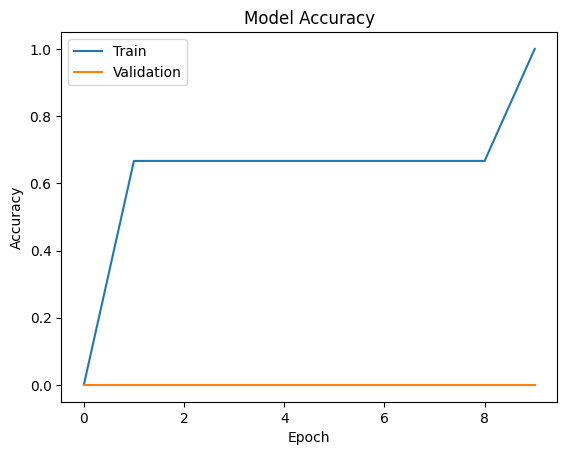

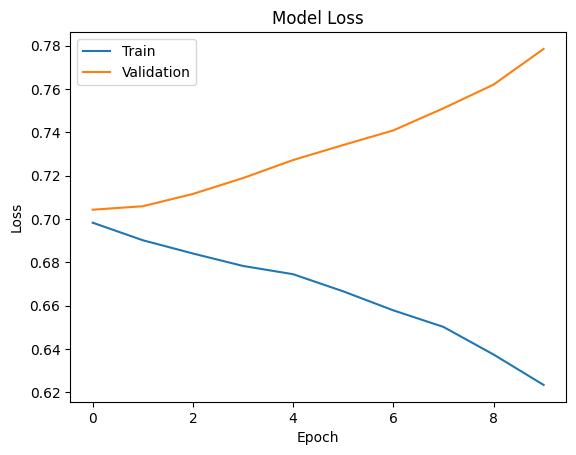

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5000 - loss: 0.7129
Test Accuracy: 0.50
Test Loss: 0.71
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
Negative


In [39]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import numpy as np
import matplotlib.pyplot as plt

# Sample data
sentences = [
    "I love this product.",  # Positive
    "This is an awful experience.",  # Negative
    "I am so happy with the service.",  # Positive
    "I will never buy this again.",  # Negative
    "What a wonderful day!",  # Positive
    "I am very disappointed."  # Negative
]

labels = [1, 0, 1, 0, 1, 0]  # 1: Positive, 0: Negative

# Tokenization and Padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

def preprocess(sentences):
    sequences = tokenizer.texts_to_sequences(sentences)
    padded_sequences = pad_sequences(sequences, padding='post')
    return padded_sequences

X = preprocess(sentences)
y = np.array(labels)

# Split the data
def split_data(X, y, train_size=0.8):
    split_idx = int(len(X) * train_size)
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(X, y)

# Define the model
model = Sequential([
    Embedding(input_dim=len(word_index) + 1, output_dim=50, input_length=X_train.shape[1]),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=2, validation_split=0.2)

# Plot training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")
print(f"Test Loss: {loss:.2f}")

# Predict new data
def predict(sentence):
    seq = preprocess([sentence])
    prediction = model.predict(seq)
    return "Positive" if prediction[0][0] > 0.5 else "Negative"

# Test predictions
print(predict("I love this product."))  # Expected: "Positive"
print(predict("This is an awful experience."))  # Expected: "Negative"
